# Working with 3D city models in Python



**Balázs Dukai** [*@BalazsDukai*](https://twitter.com/balazsdukai), **FOSS4G 2019**

Tweet <span style="color:blue">#CityJSON</span>

[3D geoinformation research group, TU Delft, Netherlands](https://3d.bk.tudelft.nl/)

![](figures/tud-3dgeoinfo-black.png)

Repo of this talk: [https://github.com/balazsdukai/foss4g2019](https://github.com/balazsdukai/foss4g2019)

# Mesh models
![](figures/google_earth.png)

Probably the most well known 3d city model is what we see in Google Earth. And it is a very nice model to look at and it is improving continuously. However, certain applications require more information than what is stored in such a mesh model. They need to know what does an object in the model represent in the real world.

# Semantic models
![](figures/semantic_model.png)

That is why we have semantic models, where for each object in the model we store a label of is meaning.

# Useful for urban analysis

![](figures/cfd.gif)

García-Sánchez, C., van Beeck, J., Gorlé, C., Predictive Large Eddy Simulations for Urban Flows: Challenges and Opportunities, Building and Environment, 139, 146-156, 2018.

# And many more...

![3d city model applications](figures/3d_cm_applications.png)

# ...mostly just production of the models

many available, but who **uses** them? **For more than visualisation?**

![open 3d city models](figures/open_cms.png)

# Software are lagging behind

+ not many software supports 3D city models

+ if they do, mostly propietary data model and format

+ large, *"eterprise"*-type applications (think Esri, FME, Bentley ... )

+ few tools accessible for the individual developer / hobbyist

# In truth, 3D CMs are a bit difficult to work with

Because our built environment is complex, and the objects are complex too

![](figures/assembling_solid.png)

2. GML doesn't help ( *[GML madness](http://erouault.blogspot.com/2014/04/gml-madness.html) by Even Rouault* )

![cityjson logo](figures/cityjson_webpage.png)

## CiyJSON aims to be 

+ *simple*, as in easy to implement
+ designed with programmers in mind
+ fully developed in the open
+ flattened hierarchy
+ <span style="color:red">implementation first</span>

![GitHub Issues](figures/github_issues.png)

# JSON-based encoding of the CityGML data model
![](figures/citygml_encoding.png)

![citygml logo](figures/citygml.png)

## The CityGML data model

![](figures/citygml_uml.gif)

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I just got sent a CityGML file. <a href="https://t.co/jnTVoRnVLS">pic.twitter.com/jnTVoRnVLS</a></p>&mdash; James Fee (@jamesmfee) <a href="https://twitter.com/jamesmfee/status/748270105319006208?ref_src=twsrc%5Etfw">June 29, 2016</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

+ files are deeply nested, and large
+ many "points of entry"
+ many diff ways to do one thing (GML doesn't help, *[GML madness](http://erouault.blogspot.com/2014/04/gml-madness.html) by Even Rouault* )

--> little software support 

## Compression ~6x over CityGML

![](figures/zurich_size.png)

## Compression
| file     | CityGML size (original) | CityGML size (w/o spaces) | textures | CityJSON | compression |
| -------- | ----------------------- | ----------------------------- |--------- | ------------ | --------------- | 
| [CityGML demo "GeoRes"](https://www.citygml.org/samplefiles/) | 4.3MB | 4.1MB | yes | 524KB | 8.0 |
| [CityGML v2 demo "Railway"](https://www.citygml.org/samplefiles/) | 45MB | 34MB | yes | 4.3MB | 8.1 |
| [Den Haag "tile 01"](https://data.overheid.nl/data/dataset/ngr-3d-model-den-haag) | 23MB | 18MB | no, material | 2.9MB | 6.2 |
| [Montréal VM05](http://donnees.ville.montreal.qc.ca/dataset/maquette-numerique-batiments-citygml-lod2-avec-textures/resource/36047113-aa19-4462-854a-cdcd6281a5af) | 56MB | 42MB | yes | 5.4MB | 7.8 |
| [New York LoD2 (DA13)](https://www1.nyc.gov/site/doitt/initiatives/3d-building.page) | 590MB | 574MB | no | 105MB | 5.5 |
| [Rotterdam Delfshaven](http://rotterdamopendata.nl/dataset/rotterdam-3d-bestanden/resource/edacea54-76ce-41c7-a0cc-2ebe5750ac18) | 16MB | 15MB | yes | 2.6MB | 5.8 |
| [Vienna (the demo file)](https://www.data.gv.at/katalog/dataset/86d88cae-ad97-4476-bae5-73488a12776d) | 37MB | 36MB | no |  5.3MB | 6.8 |
| [Zürich LoD2](https://www.data.gv.at/katalog/dataset/86d88cae-ad97-4476-bae5-73488a12776d) | 3.03GB | 2.07GB | no |  292MB | 7.1 |

![cityjson paper](figures/cityjson_paper.png)

![standards](figures/standards.png)

[https://xkcd.com/927/](https://xkcd.com/927/)

# Let's have a look-see, shall we?
![](figures/looksee.gif)

## An empty CityJSON file

![](figures/cj01.svg)

## A CityObject

![](figures/cj02.svg)

This `MulitSurface` has 

3 surfaces 
```json
[[0, 3, 2, 1]], [[4, 5, 6, 7]], [[0, 1, 5, 4]]
```
each surface has only an exterior ring (the first array)
```json
[ [0, 3, 2, 1] ]
```

## Geometry

+ **boundaries** definition uses vertex indices (inspired by Wavefront OBJ)
+ We have a vertex list at the root of the document
+ Vertices are not repeated (unlike Simple Features)
+ **semantics** are linked to the boundary surfaces
![](figures/cj04.svg)

In [1]:
import json

path = './data/rotterdam_subset.json'
with open(path) as fin:
    cm = json.loads(fin.read())
    
print(f"There are {len(cm['CityObjects'])} CityObjects")

# list all IDs
for id in cm['CityObjects']:
    print(id, "\t")

There are 16 CityObjects
{C9D4A5CF-094A-47DA-97E4-4A3BFD75D3AE} 	
{71B60053-BC28-404D-BAB9-8A642AAC0CF4} 	
{6271F75F-E8D8-4EE4-AC46-9DB02771A031} 	
{DE77E78F-B110-43D2-A55C-8B61911192DE} 	
{19935DFC-F7B3-4D6E-92DD-C48EE1D1519A} 	
{953BC999-2F92-4B38-95CF-218F7E05AFA9} 	
{8D716FDE-18DD-4FB5-AB06-9D207377240E} 	
{C6AAF95B-8C09-4130-AB4D-6777A2A18A2E} 	
{72390BDE-903C-4C8C-8A3F-2DF5647CD9B4} 	
{8244B286-63E2-436E-9D4E-169B8ACFE9D0} 	
{87316D28-7574-4763-B9CE-BF6A2DF8092C} 	
{CD98680D-A8DD-4106-A18E-15EE2A908D75} 	
{64A9018E-4F56-47CD-941F-43F6F0C4285B} 	
{459F183A-D0C2-4F8A-8B5F-C498EFDE366D} 	
{237D41CC-991E-4308-8986-42ABFB4F7431} 	
{23D8CA22-0C82-4453-A11E-B3F2B3116DB4} 	


+ Working with a CityJSON file is straightforward. One can open it with the standard library and get going.
+ But you need to know the schema well.
+ And you need to write everything from scratch.

![cjio](figures/cjio_docs.png)

That is why we are developing **cjio**. 

**cjio** is how *we eat what we cook*

Aims to help to actually work with and analyse 3D city models, and extract more value from them. Instead of letting them gather dust in some governmental repository.

## `cjio` has a (quite) stable CLI

```bash
$ cjio city_model.json reproject 2056 export --format glb /out/model.glb
```

## and an experimental API

```python
from cjio import cityjson

cm = cityjson.load('city_model.json')

cm.get_cityobjects(type='building')
```

**`pip install cjio`**

**`pip install git+https://github.com/tudelft3d/cjio@develop`**

# `cjio`'s CLI

In [2]:
! cjio --help

Usage: cjio [OPTIONS] INPUT COMMAND1 [ARGS]... [COMMAND2 [ARGS]...]...

  Process and manipulate a CityJSON file, and allow different outputs. The
  different operators can be chained to perform several processing in one
  step, the CityJSON model goes through the different operators.

  To get help on specific command, eg for 'validate':

      cjio validate --help

  Usage examples:

      cjio example.json info validate
      cjio example.json assign_epsg 7145 remove_textures export output.obj
      cjio example.json subset --id house12 save out.json

Options:
  --version                Show the version and exit.
  --ignore_duplicate_keys  Load a CityJSON file even if some City Objects have
                           the same IDs (technically invalid file)
  --help                   Show this message and exit.

Commands:
  assign_epsg                Assign a (new) EPSG.
  clean                      Clean = remove_duplicate_vertices +...
  compress                   Compress a CityJS

In [3]:
! cjio data/rotterdam_subset.json info

Parsing data/rotterdam_subset.json
{
  "cityjson_version": "1.0",
  "epsg": 7415,
  "bbox": [
    90454.18900000001,
    435614.88,
    0.0,
    91002.41900000001,
    436048.217,
    18.29
  ],
  "transform/compressed": true,
  "cityobjects_total": 16,
  "cityobjects_present": [
    "Building"
  ],
  "materials": false,
  "textures": true
}


In [4]:
! cjio data/rotterdam_subset.json validate

Parsing data/rotterdam_subset.json
===== Validation (with official CityJSON schemas) =====
-- Validating the syntax of the file
	(using the schemas 1.0.0)
-- Validating the internal consistency of the file (see docs for list)
	--Vertex indices coherent
	--Specific for CityGroups
	--Semantic arrays coherent with geometry
	--Root properties
	--Empty geometries
	--Duplicate vertices
	--Orphan vertices
	--CityGML attributes
=====
File is valid
File has warnings
--- WARNINGS ---
	(16 CityObjects have this warning)
	(16 CityObjects have this warning)
	(16 CityObjects have this warning)
	(16 CityObjects have this warning)
	(16 CityObjects have this warning)


In [5]:
! cjio data/rotterdam_subset.json \
    subset --exclude --id "{CD98680D-A8DD-4106-A18E-15EE2A908D75}" \
    merge data/rotterdam_one.json \
    reproject 2056 \
    save data/test_rotterdam.json

Parsing data/rotterdam_subset.json
Subset of CityJSON
Merging files
Reproject to EPSG:2056
  [####################################]  100%          
Saving CityJSON to a file /home/balazs/Reports/talk_cjio_foss4g_2019/data/test_rotterdam.json


```python
class CityJSON:
    # One class does everything
    
    def remove_materials(self):
        for i in self.j["CityObjects"]:
            if "material" in self.j["CityObjects"][i]:
                del self.j["CityObjects"][i]["material"]
        if "appearance" in self.j:
            if "materials" in self.j["appearance"]:
                del self.j["appearance"]["materials"]
            if "default-theme-material" in self.j["appearance"]:
                del self.j["appearance"]["default-theme-material"]
        if self.j["appearance"] is None or len(self.j["appearance"]) == 0:
            del self.j["appearance"]
        return True
```

+ The CLI was first, no plans for API

+ **Works with whole city model only**

+ Functions for the CLI work with the JSON directly, passing it along

+ Simple and effective architecture

# `cjio`'s API

Allow    *read* --> *explore* --> *modify* --> *write*    iteration

Work with CityObjects and their parts

Functions for common operations

Inspired by the *tidyverse* from the R ecosystem

In [6]:
import os
from copy import deepcopy
from cjio import cityjson
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
plt.close('all')
from sklearn.preprocessing import FunctionTransformer
from sklearn import cluster
import numpy as np

This is a subset of the 3D city model of Rotterdam
![](figures/rotterdam_subset.png)

## Using the CLI commands in the API
You can use any of the CLI commands on a CityJSON object 

*However,* not all CLI commands are mapped 1-to-1 to `CityJSON` methods

And we haven't harmonized the CLI and the API yet. 

The `load()` method loads a CityJSON file into a CityJSON object.

In [7]:
path = os.path.join('data', 'rotterdam_subset.json')

cm = cityjson.load(path)

print(type(cm))

<class 'cjio.cityjson.CityJSON'>


In [8]:
cm.validate()

-- Validating the syntax of the file
	(using the schemas 1.0.0)
-- Validating the internal consistency of the file (see docs for list)
	--Vertex indices coherent
	--Specific for CityGroups
	--Semantic arrays coherent with geometry
	--Root properties
	--Empty geometries
	--Duplicate vertices
	--Orphan vertices
	--CityGML attributes


(True,
 False,
 [],
 ["WARNING: attributes 'TerrainHeight' not in CityGML schema",
  '\t(16 CityObjects have this warning)',
  "WARNING: attributes 'bron_tex' not in CityGML schema",
  '\t(16 CityObjects have this warning)',
  "WARNING: attributes 'voll_tex' not in CityGML schema",
  '\t(16 CityObjects have this warning)',
  "WARNING: attributes 'bron_geo' not in CityGML schema",
  '\t(16 CityObjects have this warning)',
  "WARNING: attributes 'status' not in CityGML schema",
  '\t(16 CityObjects have this warning)'])

## Explore the city model

Print the basic information about the city model. Note that `print()` returns the same information as the `info` command in the CLI.

In [9]:
print(cm)

{
  "cityjson_version": "1.0",
  "epsg": 7415,
  "bbox": [
    90454.18900000001,
    435614.88,
    0.0,
    91002.41900000001,
    436048.217,
    18.29
  ],
  "transform/compressed": true,
  "cityobjects_total": 16,
  "cityobjects_present": [
    "Building"
  ],
  "materials": false,
  "textures": true
}


## Getting objects from the model
Get CityObjects by their *type*, or a list of types. Also by their IDs. 

Note that `get_cityobjects()` == `cm.cityobjects`

In [10]:
buildings = cm.get_cityobjects(type='building')

# both Building and BuildingPart objects
buildings_parts = cm.get_cityobjects(type=['building', 'buildingpart'])

r_ids = ['{C9D4A5CF-094A-47DA-97E4-4A3BFD75D3AE}',
         '{6271F75F-E8D8-4EE4-AC46-9DB02771A031}']
buildings_ids = cm.get_cityobjects(id=r_ids)

## Properties and geometry of objects

In [11]:
b01 = buildings_ids['{C9D4A5CF-094A-47DA-97E4-4A3BFD75D3AE}']
print(b01)

{
  "id": "{C9D4A5CF-094A-47DA-97E4-4A3BFD75D3AE}",
  "type": "Building",
  "attributes": {
    "TerrainHeight": 3.03,
    "bron_tex": "UltraCAM-X 10cm juni 2008",
    "voll_tex": "complete",
    "bron_geo": "Lidar 15-30 punten - nov. 2008",
    "status": "1"
  },
  "children": null,
  "parents": null,
  "geometry_type": [
    "MultiSurface"
  ],
  "geometry_lod": [
    2
  ],
  "semantic_surfaces": [
    "WallSurface",
    "GroundSurface",
    "RoofSurface"
  ]
}


In [12]:
b01.attributes

{'TerrainHeight': 3.03,
 'bron_tex': 'UltraCAM-X 10cm juni 2008',
 'voll_tex': 'complete',
 'bron_geo': 'Lidar 15-30 punten - nov. 2008',
 'status': '1'}

CityObjects can have *children* and *parents*

In [13]:
b01.children is None and b01.parents is None

True

CityObject geometry is a list of `Geometry` objects. That is because a CityObject can have multiple geometry representations in different levels of detail, eg. a geometry in LoD1 and a second geometry in LoD2.

In [14]:
b01.geometry

In [15]:
geom = b01.geometry[0]
print("{}, lod {}".format(geom.type, geom.lod))

MultiSurface, lod 2


### Geometry boundaries and Semantic Surfaces
On the contrary to a CityJSON file, the geometry boundaries are dereferenced when working with the API. This means that the vertex coordinates are included in the boundary definition, not only the vertex indices.

`cjio` doesn't provide specific geometry classes (yet), eg. MultiSurface or Solid class. If you are working with the geometry boundaries, you need to the geometric operations yourself, or cast the boundary to a geometry-class of some other library. For example `shapely` if 2D is enough.

In [16]:
transformation_object = cm.transform

# Coordinates are kept 'as is' on load, often compressed. Transform if needed.
geom_transformed = geom.transform(transformation_object)

# get the first surface
geom_transformed.boundaries[0][0]

[(90988.79100000001, 435638.657, 10.652000000000001),
 (90987.429, 435642.77, 10.652000000000001),
 (90986.46900000001, 435641.09, 10.652000000000001),
 (90985.781, 435640.846, 10.652000000000001),
 (90986.801, 435637.955, 10.652000000000001)]

In [17]:
cm_transformed = cityjson.load(path, transform=True)
print(cm_transformed)

{
  "cityjson_version": "1.0",
  "epsg": 7415,
  "bbox": [
    90454.18900000001,
    435614.88,
    0.0,
    91002.41900000001,
    436048.217,
    18.29
  ],
  "transform/compressed": false,
  "cityobjects_total": 16,
  "cityobjects_present": [
    "Building"
  ],
  "materials": false,
  "textures": true
}


Semantic Surfaces are stored in a similar fashion as in a CityJSON file, in the `surfaces` attribute of a Geometry object.

In [18]:
geom.surfaces

{0: {'surface_idx': [[0], [1], [2]], 'type': 'RoofSurface'},
 1: {'surface_idx': [[3]], 'type': 'GroundSurface'},
 2: {'surface_idx': [[4],
   [5],
   [6],
   [7],
   [8],
   [9],
   [10],
   [11],
   [12],
   [13],
   [14],
   [15],
   [16],
   [17],
   [18],
   [19]],
  'type': 'WallSurface'}}

`surfaces` does not store geometry boundaries, just references (`surface_idx`). Use the `get_surface_boundaries()` to extract the boundary.

In [19]:
roofs = geom.get_surfaces(type='roofsurface')
roofs

{0: {'surface_idx': [[0], [1], [2]], 'type': 'RoofSurface'}}

In [20]:
roof_boundaries = []
for r in roofs.values():
    roof_boundaries.append(geom.get_surface_boundaries(r))

In [21]:
roof_boundaries

[[[[[579471, 198217, 10652],
    [578109, 202330, 10652],
    [577149, 200650, 10652],
    [576461, 200406, 10652],
    [577481, 197515, 10652]]],
  [[[580840, 194082, 15211],
    [579471, 198217, 15211],
    [577481, 197515, 15211],
    [576461, 200406, 15211],
    [572239, 198909, 15211],
    [571839, 200119, 15211],
    [571503, 201071, 15211],
    [566651, 199359, 15211],
    [569801, 190223, 15211],
    [573253, 191430, 15211],
    [574658, 191922, 15211]]],
  [[[565589, 202439, 11036],
    [566651, 199359, 11036],
    [571503, 201071, 11036],
    [571839, 200119, 11036],
    [573299, 200640, 11036],
    [572089, 204029, 11036],
    [570629, 203440, 11036],
    [570379, 204150, 11036]]]]]

### Assigning attributes to Semantic Surfaces
1. extract the surfaces,
2. make the changes on the surface,
3. overwrite the CityObjects with the changes.

In [22]:
cm_copy = deepcopy(cm)
new_cos = {}
for co_id, co in cm.cityobjects.items():
    new_geoms = []
    for geom in co.geometry:
        # Only LoD >= 2 models have semantic surfaces
        if geom.lod >= 2.0:
            # Extract the surfaces
            roofsurfaces = geom.get_surfaces('roofsurface')
            for i, rsrf in roofsurfaces.items():
                # Change the attributes
                if 'attributes' in rsrf.keys():
                    rsrf['attributes']['cladding'] = 'tiles'
                else:
                    rsrf['attributes'] = {}
                    rsrf['attributes']['cladding'] = 'tiles'
                geom.surfaces[i] = rsrf
            new_geoms.append(geom)
        else:
            # Use the unchanged geometry
            new_geoms.append(geom)
    co.geometry = new_geoms
    new_cos[co_id] = co
cm_copy.cityobjects = new_cos

In [23]:
print(cm_copy.cityobjects['{C9D4A5CF-094A-47DA-97E4-4A3BFD75D3AE}'])

{
  "id": "{C9D4A5CF-094A-47DA-97E4-4A3BFD75D3AE}",
  "type": "Building",
  "attributes": {
    "TerrainHeight": 3.03,
    "bron_tex": "UltraCAM-X 10cm juni 2008",
    "voll_tex": "complete",
    "bron_geo": "Lidar 15-30 punten - nov. 2008",
    "status": "1"
  },
  "children": null,
  "parents": null,
  "geometry_type": [
    "MultiSurface"
  ],
  "geometry_lod": [
    2
  ],
  "semantic_surfaces": [
    "WallSurface",
    "GroundSurface",
    "RoofSurface"
  ]
}


### Create new Semantic Surfaces
The process is similar as previously. However, in this example we create new SemanticSurfaces that hold the values which we compute from the geometry. The input city model has a single semantic "WallSurface", without attributes, for all the walls of a building. The snippet below illustrates how to separate surfaces and assign the semantics to them.

In [24]:
new_cos = {}

for co_id, co in cm_copy.cityobjects.items():
    new_geoms = []
    
    for geom in co.geometry:
        if geom.lod >= 2.0:
            max_id = max(geom.surfaces.keys())
            old_ids = []
            
            for w_i, wsrf in geom.get_surfaces('wallsurface').items():
                old_ids.append(w_i)
                del geom.surfaces[w_i]
                boundaries = geom.get_surface_boundaries(wsrf)
                
                for j, boundary_geometry in enumerate(boundaries):
                    # The original geometry has the same Semantic for all wall, 
                    # but we want to divide the wall surfaces by their orientation, 
                    # thus we need to have the correct surface index
                    surface_index = wsrf['surface_idx'][j]
                    new_srf = {
                        'type': wsrf['type'],
                        'surface_idx': surface_index
                    }
                    
                    for multisurface in boundary_geometry:
                        # Do any operation here
                        x, y, z = multisurface[0]
                        if j % 2 > 0:
                            orientation = 'north'
                        else:
                            orientation = 'south'
                        
                        # Add the new attribute to the surface 
                        if 'attributes' in wsrf.keys():
                            wsrf['attributes']['orientation'] = orientation
                        else:
                            wsrf['attributes'] = {}
                            wsrf['attributes']['orientation'] = orientation
                        
                        new_srf['attributes'] = wsrf['attributes']
                        
                        # if w_i in geom.surfaces.keys():
                        #     del geom.surfaces[w_i]
                        
                        max_id = max_id + 1
                        geom.surfaces[max_id] = new_srf
                        
            new_geoms.append(geom)
            
        else:
            # If LoD1, just add the geometry unchanged
            new_geoms.append(geom)
            
    co.geometry = new_geoms
    new_cos[co_id] = co
    
cm_copy.cityobjects = new_cos

## Save or Export
At the end, the `save()` method saves the edited city model into a CityJSON file.

In [25]:
path_out = os.path.join('data', 'test_output.json')
cityjson.save(cm, path_out)

It is also possible to export the city model into a pandas DataFrame. Note that only the CityObject attributes are exported into the dataframe, with CityObject IDs as the index of the dataframe. Thus if you want to export the attributes of SemanticSurfaces for example, then you need to add them as CityObject attributes.

In [26]:
def assign_cityobject_attribute(cm):
    """Copy a semantic surface attribute to the CityObject level.
    Returns a copy of the citymodel.
    """
    new_cos = {}
    cm_copy = deepcopy(cm)
    for co_id, co in cm.cityobjects.items():
        for geom in co.geometry:
            for srf in geom.surfaces.values():
                if 'attributes' in srf:
                    for attr,a_v in srf['attributes'].items():
                        if (attr not in co.attributes) or (co.attributes[attr] is None):
                            co.attributes[attr] = [a_v]
                        else:
                            co.attributes[attr].append(a_v)
        new_cos[co_id] = co
    cm_copy.cityobjects = new_cos
    return cm_copy

# Analysing CityModels

![](figures/zurich.png)

In [27]:
path = os.path.join('data', 'zurich.json')
zurich = cityjson.load(path, transform=True)

## A simple geometry function

In [28]:
def compute_footprint_area(co):
    """Compute the area of the footprint"""
    footprint_area = 0
    for geom in co.geometry:
        
        # only LoD2 (or higher) objects have semantic surfaces
        if geom.lod >= 2.0:
            footprints = geom.get_surfaces(type='groundsurface')
            
            # there can be many surfaces with label 'groundsurface'
            for i,f in footprints.items():
                for multisurface in geom.get_surface_boundaries(f):
                    for surface in multisurface:
                        
                        # cast to Shapely polygon
                        shapely_poly = Polygon(surface)
                        footprint_area += shapely_poly.area
                        
    return footprint_area

## Add the new attributes

In [29]:
for co_id, co in zurich.cityobjects.items():
    co.attributes['nr_vertices'] = len(co.get_vertices())
    co.attributes['fp_area'] = compute_footprint_area(co)
    zurich.cityobjects[co_id] = co

In [30]:
df = zurich.to_dataframe()
df.head()

,creationDate,Geomtype,nr_vertices,fp_area,class,Herkunft,QualitaetStatus,FileCreationDate,Region,GebaeudeStatus
UUID_93fc5bae-4446-4336-9ff8-6679ebfdfde3,2017-01-23,1.0,24,65.209763,NaN,NaN,NaN,NaN,NaN,NaN
UUID_c9884c4e-1cac-47f5-b88b-6fb074c0ae50,2017-01-23,NaN,0,0.000000,BB01,EE_LB_2007,1.0,2012-02-23,2.0,1.0
UUID_a4a09780-153f-4385-ad19-3a92a6c4eec4,2017-01-23,1.0,38,20.784309,NaN,NaN,NaN,NaN,NaN,NaN
UUID_ba0bb815-5276-4e35-b4c1-878cbf6ba934,2017-01-23,NaN,0,0.000000,BB07,EE_LB_2007,1.0,2012-02-23,2.0,1.0
UUID_bb1835bc-7437-453f-ac08-885de0503aaa,2017-01-23,1.0,87,69.363823,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_subset = df[df['Geomtype'].notnull() & df['fp_area'] > 0.0].loc[:, ['nr_vertices', 'fp_area']]
transformer = FunctionTransformer(np.log, validate=True)
df_logtransform = transformer.transform(df_subset)

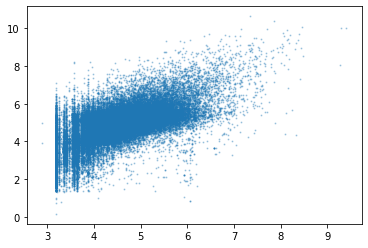

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_logtransform[:,0], df_logtransform[:,1], alpha=0.3, s=1.0)
plt.show()

In [33]:
def plot_model_results(model, data):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colormap = np.array(['lightblue', 'red', 'lime', 'blue','black'])
    ax.scatter(data[:,0], data[:,1], c=colormap[model.labels_], s=10, alpha=0.5)
    ax.set_xlabel('Number of vertices [log]')
    ax.set_ylabel('Footprint area [log]')
    plt.title(f"DBSCAN clustering with estimated {len(set(model.labels_))} clusters")
    plt.show()

<IPython.core.display.Javascript object>


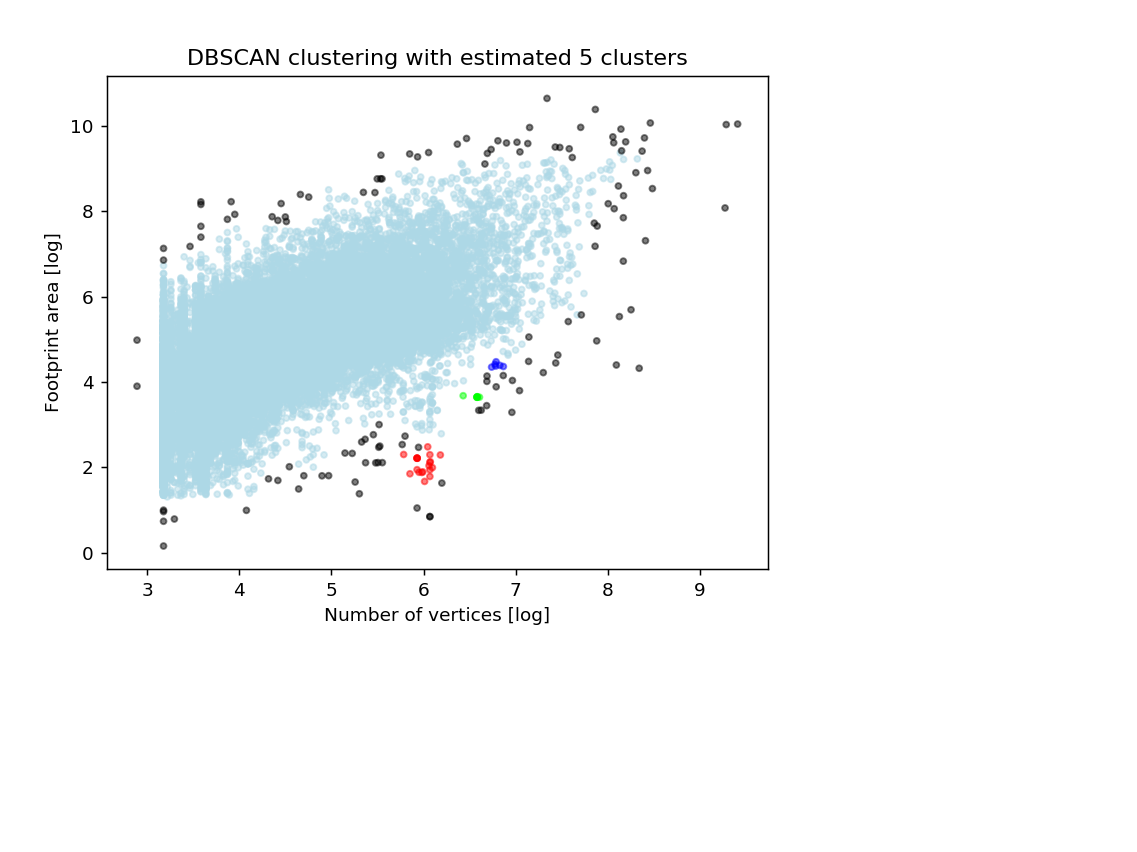

In [34]:
%matplotlib notebook
model = cluster.DBSCAN(eps=0.2).fit(df_logtransform)

plot_model_results(model, df_logtransform)

In [35]:
df_subset['dbscan'] = model.labels_

## Write the results to CityJSON

In [36]:
for co_id, co in zurich.cityobjects.items():
    if co_id in df_subset.index:
        ml_results = dict(df_subset.loc[co_id])
    else:
        ml_results = {'nr_vertices': 'nan', 'fp_area': 'nan', 'dbscan': 'nan'}
    new_attrs = {**co.attributes, **ml_results}
    co.attributes = new_attrs
    zurich.cityobjects[co_id] = co

In [37]:
path_out = os.path.join('data', 'zurich_output.json')
cityjson.save(zurich, path_out)

## And view it in QGIS again

![](figures/zurich_ml_result.png)

# Other software

## Online CityJSON viewer

![](figures/viewer.png)

## QGIS plugin
![](figures/qgis_zurich.png)

## Azul
![](figures/azul.png)

# Full conversion CityGML <--> CityJSON
![](figures/citygml4j.png)

# Thank you!

Balázs Dukai

b.dukai@tudelft.nl

@BalazsDukai

## A few links

[cityjson.org](cityjson.org)

[viewer.cityjson.org](viewer.cityjson.org)

QGIS plugin: [github.com/tudelft3d/cityjson-qgis-plugin](github.com/tudelft3d/cityjson-qgis-plugin)

Azul – CityJSON viewer on Mac – check the [AppStore](https://apps.apple.com/nl/app/azul/id1173239678?mt=12)

cjio: [github.com/tudelft3d/cjio](github.com/tudelft3d/cjio) & [tudelft3d.github.io/cjio/](tudelft3d.github.io/cjio/)